In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021
# initial value that is fed into a random number generator to create reproducible random sequences
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [39]:
dataset = pd.read_csv("creditcard.csv")
#dataset.head
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
#check for any  nullvalues
print("Any nulls in the dataset ",dataset.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ",dataset.Class.unique())
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'], sort = True) )

Any nulls in the dataset  False
-------
No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Fraud Transactions
Class
0    284315
1       492
Name: count, dtype: int64


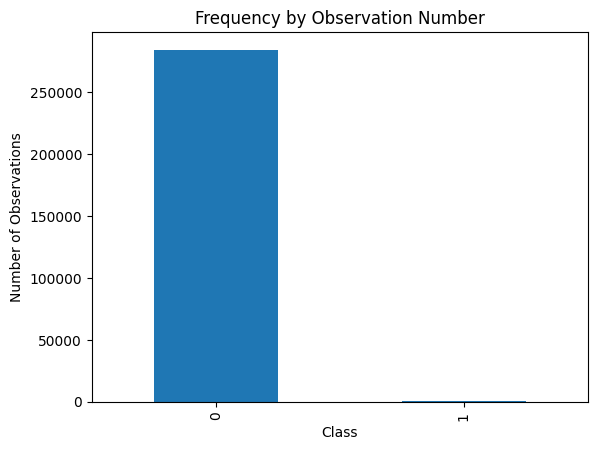

In [41]:
# Plotting class distribution
dataset['Class'].value_counts().plot(kind='bar')
plt.title("Frequency by Observation Number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.show()


In [42]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]

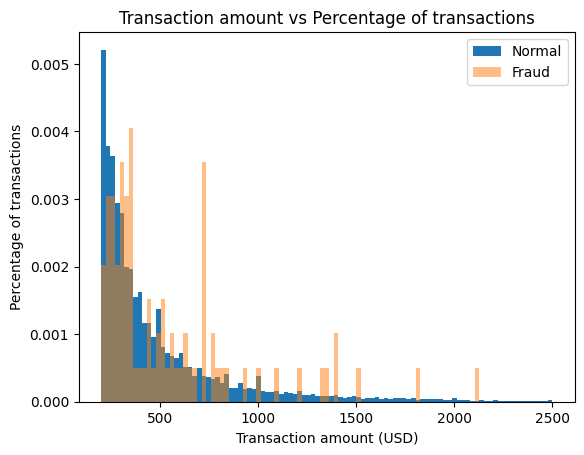

In [43]:
#Visualize transaction amounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)

plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')

plt.legend(loc='upper right')

plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [10]:
#  help distribute the data more symmetrically around zero.

sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [11]:
'''The last column in the dataset is our target variable.'''

raw_data = dataset.values
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=2021
)
#random_state : train_test_split will shuffle and divide the data in exactly the same way.

In [12]:
'''Normalize the data to have a value between 0 and 1'''
# Avoiding Negative Values

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [13]:
# '''Use only normal transactions to train the Autoencoder.
# Normal data has a value of 0 in the target variable. Using the target variable to create a normal and fraud dataset.'''

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#creating normal and fraud datasets

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
# ~ means meaning they select only normal transactions (False).
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]

print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 389
 No. of records in Normal Train data= 227456
 No. of records in Fraud Test Data= 103
 No. of records in Normal Test data= 56859


In [14]:
nb_epoch = 50 #complete passes through the training dataset
batch_size = 64  #means the model processes 64 samples at a time before adjusting weights.
input_dim = normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14 # compressing the data down to 14 dimensions.
hidden_dim_1 = int(encoding_dim / 2) #umber of neurons in the first hidden layer, which sits between the input layer and the encoding layer.
hidden_dim_2=4 #neurons in an additional hidden layer between hidden_dim_1 and the bottleneck
learning_rate = 1e-7

In [15]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder) # 20% of the neurons will be randomly deactivated during training, whic
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.keras",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    mode='min',
    monitor='val_loss',
    verbose=1,
    min_delta=0.0001,
    patience=10,
    restore_best_weights=True)

In [17]:
#Compile the Autoencoder

autoencoder.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['accuracy'],)

In [18]:
#Train the Autoencoder

history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history


Epoch 1/50
3539/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0340 - loss: 0.0242
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.keras
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.0341 - loss: 0.0241 - val_accuracy: 0.0420 - val_loss: 2.0129e-05
Epoch 2/50
3547/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0802 - loss: 1.9263e-05
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.keras
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0802 - loss: 1.9263e-05 - val_accuracy: 0.2766 - val_loss: 1.9682e-05
Epoch 3/50
3543/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1006 - loss: 1.9042e-05
Epoch 3: val_loss did not improve from 0.00002
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1006 - loss: 1.9043e-05 - val_accuracy: 0.1290 - val_loss: 1.9818e-05
Epoch 4/50
3549/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1394 - loss: 1.8988e-05
Epoch 4: val_loss improved fro

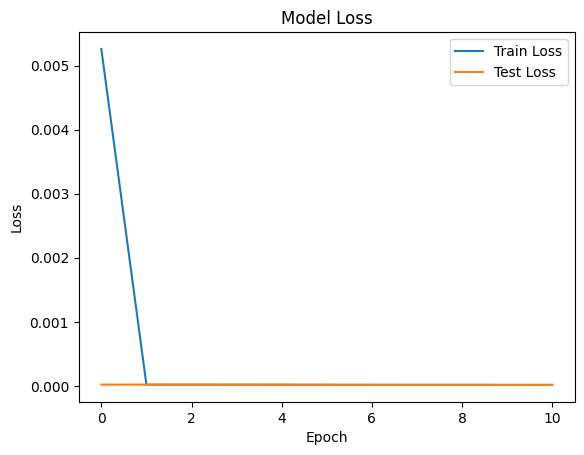

In [44]:
# Plot training and validation loss
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [20]:
# """Detect Anomalies on test data

# Anomalies are data points where the reconstruction loss is higher

# To calculate the reconstruction loss on test data,
# predict the test data and calculate the mean square error between the test data and the reconstructed test data."""

test_x_predictions = autoencoder.predict(test_data)

mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
print("MSE: ",mse)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})
pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
MSE:  [1.7384340e-05 1.2646260e-05 1.1700325e-05 ... 1.1286158e-05 7.6685283e-06
 9.1298298e-06]


,Reconstruction_error,True_class
0,0.000017,False
1,0.000013,False
2,0.000012,False
3,0.000010,False
4,0.000824,False
...,...,...
56957,0.000009,False
56958,0.000005,False
56959,0.000011,False
56960,0.000008,False


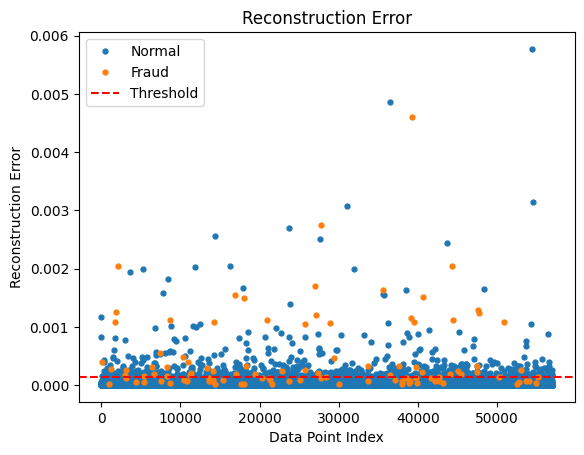

In [47]:
# Plot reconstruction error for normal and fraud data
fig, ax = plt.subplots()

# Group and plot each type of transaction
for name, group in error_df.groupby('True_class'):
    ax.plot(group.index, group.Reconstruction_error, 'o', ms=3.5, label="Fraud" if name == 1 else "Normal")

# Draw a threshold line
ax.axhline(y=threshold_fixed, color="r", label="Threshold", linestyle="--")

# Add labels and legend
ax.legend()
plt.title("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.ylabel("Reconstruction Error")
plt.show()


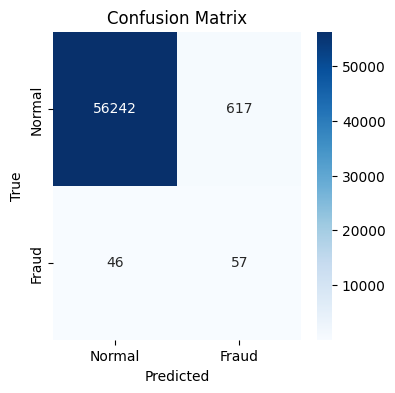

Accuracy: 0.9883606614936273
Recall: 0.5533980582524272
Precision: 0.08456973293768547


In [51]:
# Detect anomalies based on reconstruction error threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error]

# Plot confusion matrix
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print performance metrics
print("Accuracy:", accuracy_score(error_df['True_class'], pred_y))
print("Recall:", recall_score(error_df['True_class'], pred_y))
print("Precision:", precision_score(error_df['True_class'], pred_y))


In [49]:
history

{'accuracy': [0.040284715592861176,
  0.07943074405193329,
  0.10985860973596573,
  0.15085116028785706,
  0.19694358110427856,
  0.23869670927524567,
  0.25126177072525024,
  0.2716745138168335,
  0.2796540856361389,
  0.2793067693710327,
  0.27742069959640503],
 'loss': [0.005259789060801268,
  1.9194165361113846e-05,
  1.9060495105804875e-05,
  1.893529224616941e-05,
  1.8279051801073365e-05,
  1.7177873814944178e-05,
  1.679351771599613e-05,
  1.636391789361369e-05,
  1.6112546290969476e-05,
  1.601355688762851e-05,
  1.591040017956402e-05],
 'val_accuracy': [0.04197535291314125,
  0.2765703499317169,
  0.12901583313941956,
  0.1647765189409256,
  0.027000457048416138,
  0.2710579037666321,
  0.2813805639743805,
  0.27620166540145874,
  0.29854992032051086,
  0.2945121228694916,
  0.30564236640930176],
 'val_loss': [2.012908589676954e-05,
  1.968228752957657e-05,
  1.981825516850222e-05,
  1.891806095954962e-05,
  1.8538865333539434e-05,
  1.765463821357116e-05,
  1.705019894870929